# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [3]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [4]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [5]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [30]:
# You will need to import numpy
import numpy as np

df = pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [11]:
parallax = df["parallax"].loc[df["group_id"] == 3]
distance4 = df["distance"].loc[df["group_id"] == 3]
G = df["G"].loc[df["group_id"] == 3]
J = df["J"].loc[df["group_id"] == 3]
print(distance4)

394     94.503
395    116.652
396    105.757
397    105.168
398    106.113
399     97.309
400     98.067
401    107.382
402    101.995
403    106.424
404    101.547
405     95.628
406     96.193
407    101.329
408    106.434
409     99.253
410    105.687
411    107.695
412    108.646
413    111.217
414     99.134
415     93.869
416    106.523
417    113.928
418    103.126
419    104.148
420    110.659
421    120.672
422    110.956
423    108.487
        ...   
478    117.983
479    106.761
480    117.125
481    126.235
482    121.355
483    122.450
484    125.327
485    122.850
486    103.335
487    116.894
488    120.115
489    109.883
490    104.905
491    119.530
492    100.335
493    103.759
494    105.704
495    114.830
496    110.738
497    114.549
498    110.819
499    105.090
500    104.021
501     99.355
502    112.500
503     93.711
504    110.719
505    102.565
506    115.426
507    111.470
Name: distance, Length: 114, dtype: float64


In [12]:
# You can use this function in your code to find the log of distance:
#np.log10()
absmag = G - 5*(np.log10(distance4))+5
print(absmag)


394    3.204772
395    2.579539
396    5.364454
397    0.958582
398    5.306157
399    5.314235
400    2.445386
401    3.894343
402    5.791106
403    3.219802
404    4.180665
405    3.505075
406    1.885283
407    2.394331
408    3.086598
409    2.004282
410    5.623892
411    3.785022
412    5.195931
413    5.671144
414    3.153887
415    3.480389
416    3.023783
417    5.306848
418    2.650159
419    1.449745
420    2.719066
421    1.980967
422    5.170246
423    3.111112
         ...   
478    6.217903
479    2.850937
480    3.445752
481    4.150101
482    3.288712
483    4.736206
484    2.824777
485    3.411124
486    1.720763
487    2.572039
488    2.346014
489    3.391347
490    2.480019
491    5.518615
492    2.828738
493    5.221871
494    0.963543
495    5.693723
496    4.232517
497    3.648043
498    3.679929
499    5.740193
500    1.573395
501    3.894051
502    2.194237
503    3.095047
504    3.737889
505    3.482004
506    4.533482
507    5.878210
Length: 114, dtype: floa

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
%matplotlib inline 

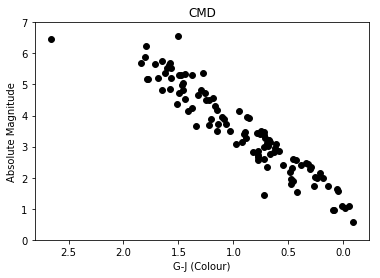

In [33]:
cm = plt.cm.get_cmap("RdBu")
c = G-J
plt.scatter(c, absmag, s=35, cmap=cm, color = "black")
plt.ylim([0, 7])
plt.xlabel('G-J (Colour)')
plt.ylabel('Absolute Magnitude')
plt.title('CMD')
plt.gca().invert_xaxis()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster